# **DATA LOADING**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
file_path = '/content/drive/My Drive/QVI_purchase_behaviour.csv'
purchase_df = pd.read_csv(file_path)

In [74]:
file_path2 = '/content/drive/My Drive/QVI_transaction_data.xlsx'
transaction_df = pd.read_excel(file_path2)

In [75]:
purchase_df.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [76]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


# **DATA PREPROCESSING**

- Check for Null Values

  - No null values were found in both DataFrames.
- Check for Duplicate Values

  - Found one duplicate row in the transaction DataFrame.
- Correcting Data Types

  - The Date column has been set to the date format.
- Creating New Columns

  - Created two new columns: Packet_Size and Brands for the transaction DataFrame.
- Removing Unwanted Rows

  - Removed rows that are not related to chips or do not belong to the chips brand (specifically, rows with 'Salsa').
- Correcting Misspelled Brand Names

  - Corrected brand names that were misspelled.
- Removing Outliers

  - Removed outliers found in the TOTAL_SALES and PDT_QTY columns.


Checking for missing values in both the dataframes

In [77]:
print(purchase_df.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [78]:
purchase_df.duplicated().sum()


0

In [79]:
print(transaction_df.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [80]:
transaction_df.duplicated().sum()

1

In [81]:
transaction_df[transaction_df.duplicated(keep = False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [82]:
# Remove duplicates while keeping the first occurrence (drop the last)
transaction_df.drop_duplicates(keep='last', inplace=True)

In [83]:
transaction_df.duplicated().sum()

0

Checking for data types

In [84]:
purchase_df.dtypes

,0
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object


In [85]:
transaction_df.dtypes
#date datatype has to be changed to better understand the data


,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [86]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], unit ='D',origin = '1899-12-30')
#this line of code effectively transforms a column of integer values representing days since a specific date into a more useful datetime format,
#enabling easier manipulation and analysis of date-related data within the DataFrame.

In [87]:
unique_date = transaction_df['DATE'].unique()
len(unique_date)

364

In [88]:
#find out which date is missing data
# Create sequence of date
all_dates = list(pd.to_datetime(range(365), unit='D', origin='2018-07-01'))
missing_date = [dt for dt in all_dates if dt not in transaction_df['DATE'].unique()][0]

missing_date

#christmas day data is missing as its a public holiday

Timestamp('2018-12-25 00:00:00')

Explanation of Parameters:
unit='D': Indicates that the integer values in the DATE column represent the number of days.
origin='1899-12-30': Sets the starting point (epoch) for the date calculation. This is commonly used for converting Excel serial dates, which count days from December 30, 1899

In [89]:
#lets check the data types again
transaction_df.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [90]:
#lets create a new column Packet_size and convert it into numeric format
transaction_df['PACKET_SIZE'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)', expand=False)
transaction_df['PACKET_SIZE'] = pd.to_numeric(transaction_df['PACKET_SIZE'], errors='coerce')

# Print the DataFrame to see the extracted numbers or the packet size
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [91]:
#check the packet_size datatype
transaction_df.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64
PACKET_SIZE,int64


In [92]:
#len(UniquePdtsName)

In [93]:
# This operation removes any rows where the PROD_NAME column contains the substring "Salsa," ignoring case differences
transaction_df = transaction_df[~transaction_df['PROD_NAME'].str.contains('Salsa', case=False, na=False)]


In [94]:
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split(' ').str[0]
#The code creates a new column Brand in the DataFrame transaction_df by extracting the first word from each product name in the PROD_NAME column.

In [95]:
transaction_df['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,27389
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


In [96]:
#the code corrects the brand names
transaction_df['BRAND'] = transaction_df['BRAND'].replace({
    r'\bSmith\b': 'Smiths',
    r'\bDorito\b': 'Doritos',
    r'\bGrnWves|Grain\b': 'Grain Waves',
    r'\bNatural|NCC\b': 'Natural Chip Co',
    r'\bInfzns\b': 'Infuzions',
    r'\bRed\b': 'RRD',
    r'\bSnbts\b': 'Sunbites',
    r'\bWW\b': 'Woolworths',
    r'\Burger\b': 'Burger Rings'

}, regex=True)


### Removing Outliers from customer transaction data

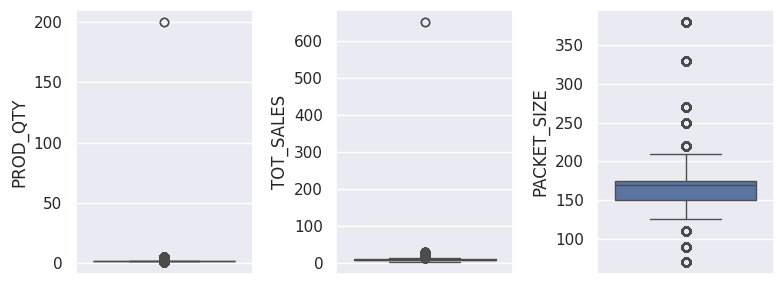

In [97]:
# analysing the outliers in total sales , product quantity and packet_size columns
sns.set_theme()
fig, ax = plt.subplots(ncols=3, figsize=(8,3))

sns.boxplot(
    data = transaction_df,
    y = 'PROD_QTY',
    ax=ax[0]
)
sns.boxplot(
    data = transaction_df,
    y = 'TOT_SALES',
    ax=ax[1]
)

sns.boxplot(
    data = transaction_df,
    y = 'PACKET_SIZE',
    ax=ax[2]

)
fig.tight_layout()


In [98]:
# Product Quantity value 200 is an outlier .
transaction_df[transaction_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos


In [99]:
transaction_df[transaction_df['TOT_SALES']>= 600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos


In [100]:
# lets remove the outlier customer with id = 226000
transaction_df = transaction_df[~(transaction_df['LYLTY_CARD_NBR'] == 226000)]

In [101]:
#lets create 2 more columns 'MONTH' name  and 'DAY' name for the transaction DataFrame

transaction_df['MONTH'] = transaction_df['DATE'].dt.month_name()
transaction_df['DAY'] = transaction_df['DATE'].dt.day_name()



<ipython-input-101-14f826e88e73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['MONTH'] = transaction_df['DATE'].dt.month_name()
<ipython-input-101-14f826e88e73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['DAY'] = transaction_df['DATE'].dt.day_name()


In [102]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND,MONTH,DAY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,October,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,May,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,May,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,August,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,August,Saturday


# **EXPLORATORY DATA ANALYSIS**

In [103]:
# lets look at the Premium customers lifestage stats
lifestage_counts = purchase_df['LIFESTAGE'].value_counts()

lifestage_percentage = purchase_df['LIFESTAGE'].value_counts(normalize=True) * 100

lifestage_summary = pd.DataFrame({'Count': lifestage_counts,
    'Percentage': lifestage_percentage.round(2)})

lifestage_summary.sort_values(by='Count', ascending=False)

,Count,Percentage
LIFESTAGE,,
RETIREES,14805,20.38
OLDER SINGLES/COUPLES,14609,20.11
YOUNG SINGLES/COUPLES,14441,19.88
OLDER FAMILIES,9780,13.46
YOUNG FAMILIES,9178,12.64
MIDAGE SINGLES/COUPLES,7275,10.02
NEW FAMILIES,2549,3.51


In [104]:
# Premium Customer Category Stats
premium_customer_count = purchase_df['PREMIUM_CUSTOMER'].value_counts()

premium_customer_percentage = purchase_df['PREMIUM_CUSTOMER'].value_counts(normalize=True)*100

premium_customer_summary = pd.DataFrame({'PremiumCustomer_Count':premium_customer_count,'PremiumCustomer_Percentage':premium_customer_percentage.round(2)})

premium_customer_summary.sort_values(by='PremiumCustomer_Count',ascending=False)

,PremiumCustomer_Count,PremiumCustomer_Percentage
PREMIUM_CUSTOMER,,
Mainstream,29245,40.26
Budget,24470,33.69
Premium,18922,26.05


Premium Mainstream Customer tend be the most with 40.46% of overall Premium Cutsomer category

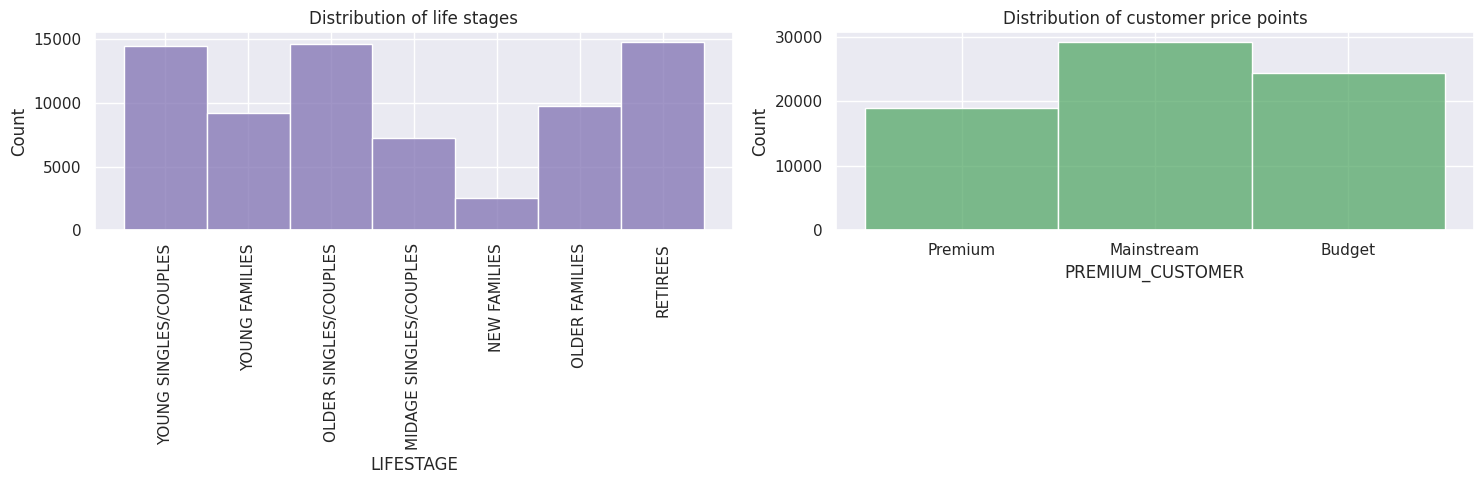

In [105]:
# Frequency bar chart for lifestage
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(
    data = purchase_df,
    x= 'LIFESTAGE',
    ax=ax[0],
    color=sns.color_palette()[4]
)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title("Distribution of life stages")

sns.histplot(
    data = purchase_df,
    x= 'PREMIUM_CUSTOMER',
    ax=ax[1],
    color=sns.color_palette()[2]
)
ax[1].set_title("Distribution of customer price points")

fig.tight_layout()

In [107]:
df_premium_customer = purchase_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].count().reset_index(name='Count')  # Create the DataFrame


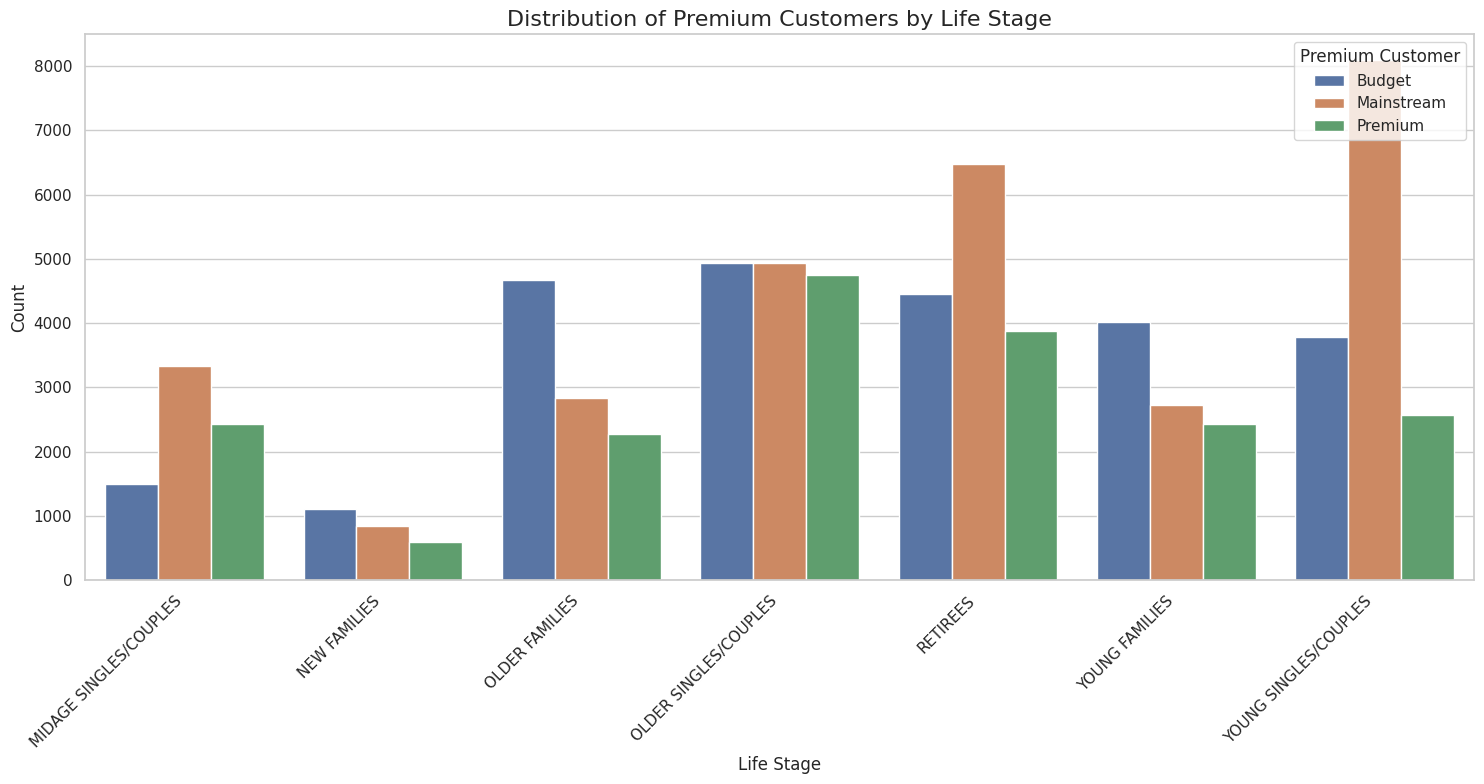

In [108]:
# Set the figure size and style
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a grouped bar chart
sns.barplot(
    data=df_premium_customer,
    x='LIFESTAGE',
    y='Count',
    hue='PREMIUM_CUSTOMER'
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title("Distribution of Premium Customers by Life Stage", fontsize=16)
plt.xlabel("Life Stage", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend
plt.legend(title="Premium Customer", loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


### Merging two dataframes

In [109]:
retail_data = transaction_df.merge(purchase_df, on='LYLTY_CARD_NBR', how='inner')
retail_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND,MONTH,DAY,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,October,Wednesday,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,May,Tuesday,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,May,Monday,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,August,Friday,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,August,Saturday,MIDAGE SINGLES/COUPLES,Budget


# Exploratoty Data Analysis on Retail Data


In [110]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246739 entries, 0 to 246738
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246739 non-null  datetime64[ns]
 1   STORE_NBR         246739 non-null  int64         
 2   LYLTY_CARD_NBR    246739 non-null  int64         
 3   TXN_ID            246739 non-null  int64         
 4   PROD_NBR          246739 non-null  int64         
 5   PROD_NAME         246739 non-null  object        
 6   PROD_QTY          246739 non-null  int64         
 7   TOT_SALES         246739 non-null  float64       
 8   PACKET_SIZE       246739 non-null  int64         
 9   BRAND             246739 non-null  object        
 10  MONTH             246739 non-null  object        
 11  DAY               246739 non-null  object        
 12  LIFESTAGE         246739 non-null  object        
 13  PREMIUM_CUSTOMER  246739 non-null  object        
dtypes: d

In [111]:
retail_data.duplicated().sum()

0

In [112]:
numeric =retail_data[['PROD_QTY','TOT_SALES','PACKET_SIZE']]

In [113]:
numeric.describe()

,PROD_QTY,TOT_SALES,PACKET_SIZE
count,246739.000000,246739.000000,246739.000000
mean,1.906456,7.316118,175.583523
std,0.342500,2.474901,59.432239
min,1.000000,1.700000,70.000000
25%,2.000000,5.800000,150.000000
50%,2.000000,7.400000,170.000000
75%,2.000000,8.800000,175.000000
max,5.000000,29.500000,380.000000


**Output Summary**

This output provides a comprehensive overview of the distribution and central tendency of the PROD_QTY, TOT_SALES, and Packet_Size variables in the dataset.

The average product quantity sold per transaction is around 1.91, with most transactions involving 1 to 2 products. Total sales values vary but tend to average around 7.32. The packet sizes range from 70 to 380 grams, with an average of 182.20 grams.





Kettle is the most favorite brand

<ipython-input-114-ac2983a78a90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


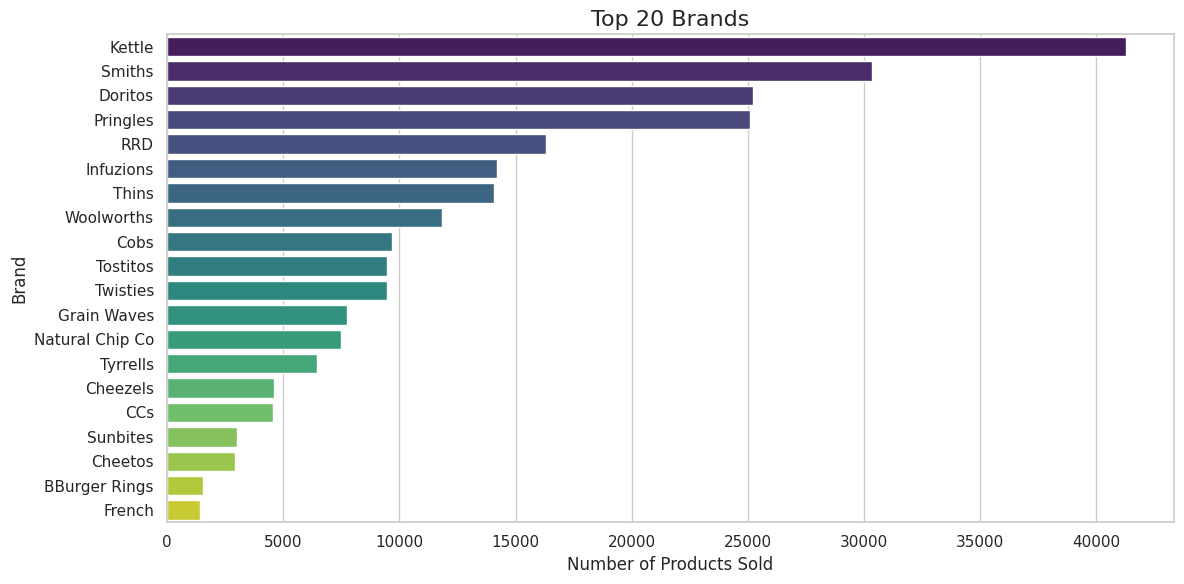

In [114]:
brand_counts = retail_data['BRAND'].value_counts()

top_brands = brand_counts.head(20)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 20 Brands', fontsize=16)
plt.xlabel('Number of Products Sold', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

**Monthly Sales**

- Lowest Sales: February has the lowest total sales, around 140,480.
- Highest Sales: December shows the highest total sales, approximately 156,461.6.
- Consistency: The total sales are relatively consistent across months, with no dramatic spikes or drops.

- Interpretation:
This suggests that sales are steady throughout the year, but there might be a slight increase in sales during December (possibly due to holiday shopping). February might have fewer shopping days or lower consumer activity.

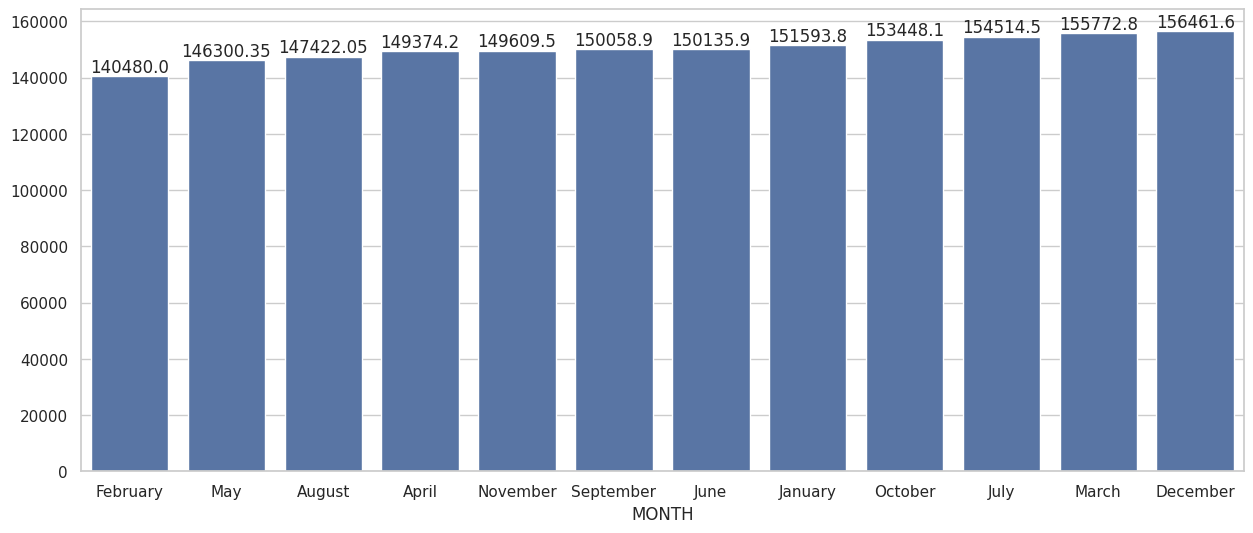

In [115]:
#total sales by month
monthly_sales = retail_data.groupby('MONTH')['TOT_SALES'].sum()
#plot monthly sales and sort it ascending
monthly_sales = monthly_sales.sort_values()
plt.figure(figsize=(15, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt
#show the values on each bar
for i, v in enumerate(monthly_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

**Monthly Sales Volume**

- Lowest Volume: February again has the lowest volume of products sold, with 36,541 units.
- Highest Volume: December has the highest product volume, with 40,778 units sold.
- Consistency: Similar to the sales trend, the product volumes remain steady, with only slight variations across months.
- Interpretation:
The product quantity trend aligns with the sales trend, showing that both sales and volume increase slightly in December. February’s lower performance in both metrics could be linked to shorter days or reduced consumer activity.



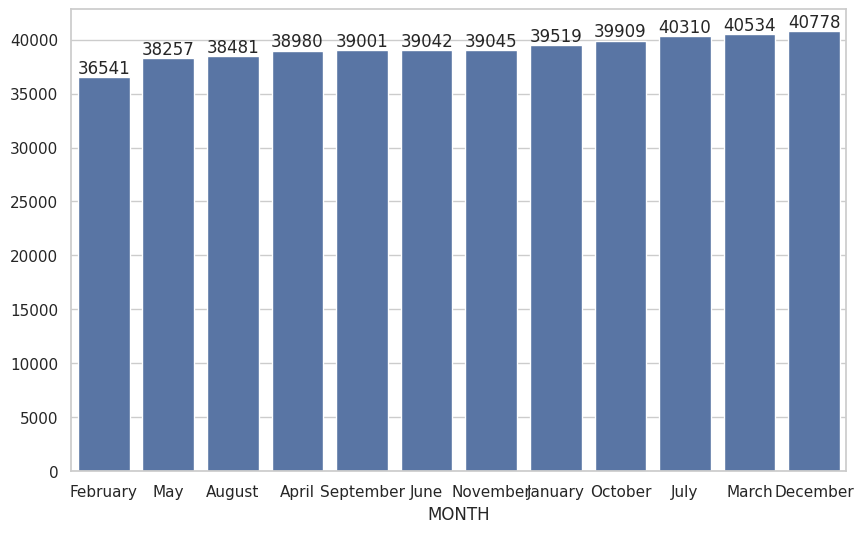

In [116]:
#total volume by month
monthly_volume = retail_data.groupby('MONTH')['PROD_QTY'].sum()
#sort the montly volume and plot
monthly_volume = monthly_volume.sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_volume.index, y=monthly_volume.values)
plt
#show the volume at each bar
for i, v in enumerate(monthly_volume.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

**Sales by Day**

Key Takeaways:

- Lowest Sales: Tuesday has the lowest total sales, amounting to 252,832.2.
Highest Sales: Sunday has the highest total sales, reaching 263,927.8.
Variation Across Days: The sales figures across all days are relatively close, with only minor differences.
- Interpretation:

 - Weekday vs. Weekend Trend:
Sunday and Friday show slightly higher sales, indicating potential increased consumer activity on weekends.
 - Mid-week days (Tuesday and Thursday) appear to have marginally lower sales compared to the weekend.
 - Consistency: Sales remain fairly steady throughout the week, with no drastic dips or spikes, suggesting a stable customer base



- Business Implication:
While sales are steady, focusing on weekend promotions (Friday to Sunday) might enhance revenue further since these days already perform slightly better.
Investigating the dip on Tuesday may reveal opportunities to boost engagement or implement targeted campaigns

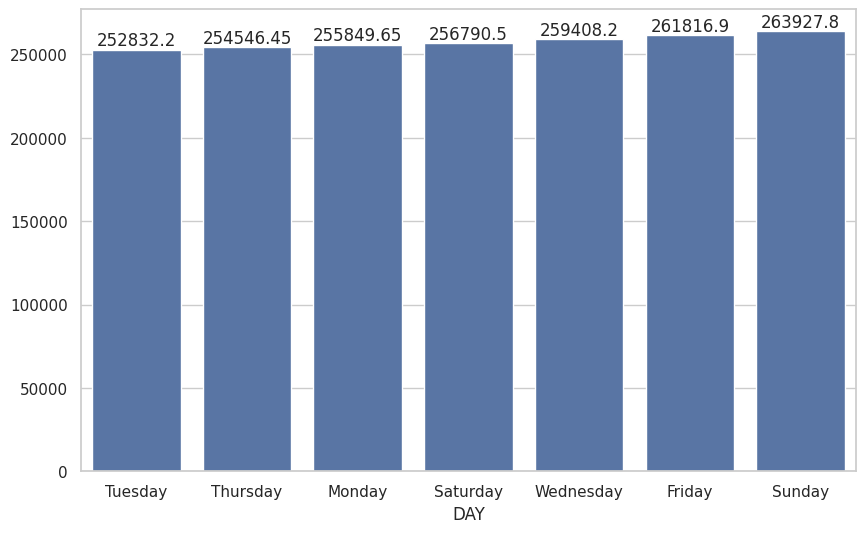

In [117]:
# Find the day with the maximum sales
day_sales = retail_data.groupby('DAY')['TOT_SALES'].sum()
day_sales  = day_sales.sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales .index, y=day_sales .values)
plt
##show the total sales at each bar
for i, v in enumerate(day_sales .values):
    plt.text(i, v, str(v), ha='center', va='bottom')

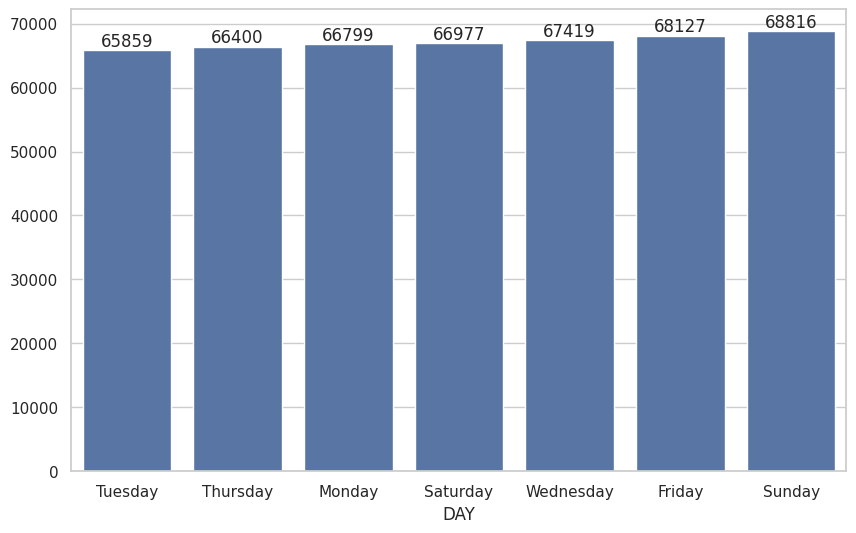

In [118]:
# Find the day with the maximum sales by volume
day_volume = retail_data.groupby('DAY')['PROD_QTY'].sum()
day_volume  = day_volume.sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_volume .index, y=day_volume .values)
#show the total sales at each bar
for i, v in enumerate(day_volume .values):
    plt.text(i, v, str(v), ha='center', va='bottom')

Snack chips sales are highest in December due to festive celebrations, increased gatherings, and promotional campaigns, while February sees the lowest sales due to post-holiday spending cuts, health resolutions, and fewer social events. Seasonal and behavioral factors, like winter preferences and reduced advertising, also contribute.

**SALES AND CUSTOMER BEHAVIOUR ANALYSIS BY LIFESTAGE GROUP**









- **High Sales Groups:** "Older Singles/Couples" and "Retirees" drive the majority
of sales (over 39% combined), indicating these are key demographics to target.

- **Bulk Buyers:** "Older Families" and "Young Families" purchase more packets per customer on average, making them potential targets for bulk or volume-based promotions.

- **Price Sensitivity:** The average price per unit remains fairly stable across groups, suggesting similar pricing strategies for most customer segments.

- **Opportunities:** Groups like "New Families" and "Young Singles/Couples," which contribute smaller portions of sales, could be targeted with marketing campaigns to increase engagement.







In [119]:
# calculate the customer percentage per lifestage
sales_by_LG = retail_data.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()
sales_by_LG['Percent'] = 100*sales_by_LG['TOT_SALES'] / sales_by_LG['TOT_SALES'].sum()
sales_by_LG['Percent'] = sales_by_LG['Percent'].round(2)
sales_by_LG.sort_values('Percent', ascending=False, inplace=True)

# Add number of customers
cust_count = retail_data.groupby(['LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().reset_index()
sales_by_LG = sales_by_LG.merge(cust_count, how='inner', on=['LIFESTAGE',])

# Add average number of packets bought per customer
avg_qty = retail_data.groupby(['LIFESTAGE', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().groupby(['LIFESTAGE']).mean().reset_index().round(2)
sales_by_LG = sales_by_LG.merge(avg_qty, how='inner', on=['LIFESTAGE'])

# Average price per unit sold
retail_data['unit_price'] = retail_data['TOT_SALES'] / retail_data['PROD_QTY']
avg_price = retail_data.groupby(['LIFESTAGE'])['unit_price'].mean().round(2)
sales_by_LG = sales_by_LG.merge(avg_price, how='inner', on=['LIFESTAGE'])

sales_by_LG.rename(columns={'LYLTY_CARD_NBR':'cust_count', 'PROD_QTY':'avg_qty', 'unit_price':'avg_price'}, inplace=True)
sales_by_LG.sort_values('Percent', ascending=False, inplace=True)
sales_by_LG



,LIFESTAGE,TOT_SALES,Percent,cust_count,avg_qty,avg_price
0,OLDER SINGLES/COUPLES,376013.65,20.83,14389,6.75,3.86
1,RETIREES,342381.90,18.97,14555,6.04,3.89
2,OLDER FAMILIES,328519.90,18.20,9630,9.13,3.74
3,YOUNG FAMILIES,294627.90,16.32,9036,8.70,3.75
4,YOUNG SINGLES/COUPLES,243756.60,13.50,14044,4.44,3.89
5,MIDAGE SINGLES/COUPLES,172523.80,9.56,7141,6.23,3.87
6,NEW FAMILIES,47347.95,2.62,2492,4.84,3.91


**Sales Performance Analysis Across Lifestages and Customer Segments**

- Older Families and Retirees are key customers:Older Families, particularly in the Budget category, make significant contributions to sales and purchase large quantities, showing strong demand and loyalty.
- Retirees also exhibit consistent buying behavior, with a focus on Budget and Mainstream products.
- Young Singles/Couples are price-sensitive:
Despite having a high number of customers, the average price paid per unit is higher for Mainstream customers but lower for Budget customers. This shows variation in product preferences.
- Premium Segments are niche but valuable: While Premium customers represent smaller segments, their purchases tend to skew toward higher unit prices.
- New Families are a low-engagement segment:
They have the lowest total sales and customer counts, indicating potential for targeted marketing or product offerings to increase their engagement.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

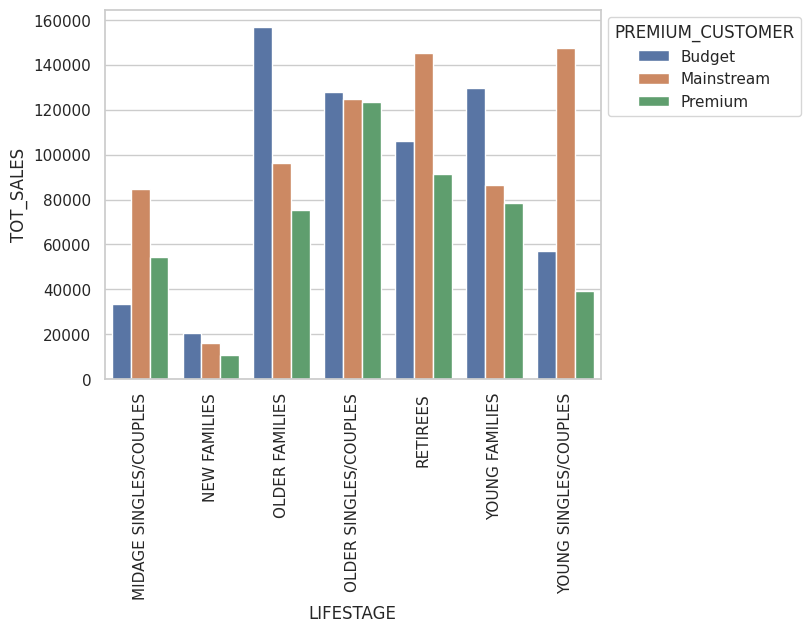

In [120]:
# Total sales by lifestage and premium_customeror

sales_by_segment = retail_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

g=sns.barplot(
    data = sales_by_segment,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER'
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

In [121]:
#customer sales percentage by segment/lifestage
sales_by_segment = retail_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_by_segment['Percent'] = 100*sales_by_segment['TOT_SALES'] / sales_by_segment['TOT_SALES'].sum()
sales_by_segment['Percent'] = sales_by_segment['Percent'].round(2)
sales_by_segment.sort_values('Percent', ascending=False, inplace=True)

# Add number of customers
cust_count = retail_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
sales_by_segment = sales_by_segment.merge(cust_count, how='inner', on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Add average number of packets bought per customer
avg_qty = retail_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).mean().reset_index().round(2)
sales_by_segment = sales_by_segment.merge(avg_qty, how='inner', on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Average price per unit sold
retail_data['unit_price'] = retail_data['TOT_SALES'] / retail_data['PROD_QTY']
avg_price = retail_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['unit_price'].mean().round(2)
sales_by_segment = sales_by_segment.merge(avg_price, how='inner', on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

sales_by_segment.rename(columns={'LYLTY_CARD_NBR':'cust_count', 'PROD_QTY':'avg_qty', 'unit_price':'avg_price'}, inplace=True)
sales_by_segment


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Percent,cust_count,avg_qty,avg_price
0,OLDER FAMILIES,Budget,156863.75,8.69,4611,9.08,3.75
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20,8.18,7917,4.58,4.07
2,RETIREES,Mainstream,145168.95,8.04,6358,5.93,3.84
3,YOUNG FAMILIES,Budget,129717.95,7.19,3953,8.72,3.76
4,OLDER SINGLES/COUPLES,Budget,127833.60,7.08,4849,6.78,3.88
5,OLDER SINGLES/COUPLES,Mainstream,124648.50,6.91,4858,6.71,3.81
6,OLDER SINGLES/COUPLES,Premium,123531.55,6.84,4682,6.77,3.89
7,RETIREES,Budget,105916.30,5.87,4385,6.14,3.92
8,OLDER FAMILIES,Mainstream,96413.55,5.34,2788,9.26,3.74
9,RETIREES,Premium,91296.65,5.06,3812,6.10,3.92


In [122]:
#Premium_customer sales percentage
sales_by_PC = retail_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_by_PC['Percent'] = 100*sales_by_PC['TOT_SALES'] / sales_by_PC['TOT_SALES'].sum()
sales_by_PC['Percent'] = sales_by_PC['Percent'].round(2)
sales_by_PC.sort_values('Percent', ascending=False, inplace=True)

# Add number of Premium_customer
cust_count = retail_data.groupby(['PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
sales_by_PC = sales_by_PC.merge(cust_count, how='inner', on=['PREMIUM_CUSTOMER'])

# Add average number of packets bought per Premium_customer
avg_qty = retail_data.groupby(['PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().groupby(['PREMIUM_CUSTOMER']).mean().reset_index().round(2)
sales_by_PC = sales_by_PC.merge(avg_qty, how='inner', on=['PREMIUM_CUSTOMER'])

# Average price per unit sold
retail_data['unit_price'] = retail_data['TOT_SALES'] / retail_data['PROD_QTY']
avg_price = retail_data.groupby(['PREMIUM_CUSTOMER'])['unit_price'].mean().round(2)
sales_by_PC = sales_by_PC.merge(avg_price, how='inner', on=['PREMIUM_CUSTOMER'])

sales_by_PC.rename(columns={'LYLTY_CARD_NBR':'cust_count', 'PROD_QTY':'avg_qty', 'unit_price':'avg_price'}, inplace=True)
sales_by_PC





,PREMIUM_CUSTOMER,TOT_SALES,Percent,cust_count,avg_qty,avg_price
0,Mainstream,700865.40,38.83,28734,6.29,3.87
1,Budget,631406.85,34.98,24006,6.91,3.80
2,Premium,472899.45,26.20,18547,6.68,3.81


**Actionable Recommendations:**
- Focus on expanding offerings for Older Families and Retirees in the Budget and Mainstream categories to capitalize on their loyalty and purchasing behavior.
- Develop strategies to boost engagement with New Families, potentially through promotional offers or tailored campaigns to attract more customers.
- Further investigate the high price sensitivity and product preferences of Young Singles/Couples to optimize pricing and product assortments for this group.